<a href="https://colab.research.google.com/github/thoufiqz55/KNN_NB/blob/main/KNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/ortho_knnnb.csv')

In [ ]:
df.head()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Finding Missing values

In [ ]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
df.shape

(310, 7)

In [ ]:
df.describe()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

Correlation 

In [ ]:
df.corr()

pelvic_incidence  pelvic_tilt numeric  \
pelvic_incidence                  1.000000             0.629199   
pelvic_tilt numeric               0.629199             1.000000   
lumbar_lordosis_angle             0.717282             0.432764   
sacral_slope                      0.814960             0.062345   
pelvic_radius                    -0.247467             0.032668   
degree_spondylolisthesis          0.638743             0.397862   
symptom_class                    -0.353336            -0.326063   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt numeric                    0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   
symptom_class                         -0.312484     -0.210602       0.309857   

                          degree_spondylolisthesis  symptom_class  
pelvic_incidence                          0.638743      -0.353336  
pelvic_tilt numeric                       0.397862      -0.326063  
lumbar_lordosis_angle                     0.533667      -0.312484  
sacral_slope                              0.523557      -0.210602  
pelvic_radius                            -0.026065       0.309857  
degree_spondylolisthesis                  1.000000      -0.443687  
symptom_class                            -0.443687       1.000000

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

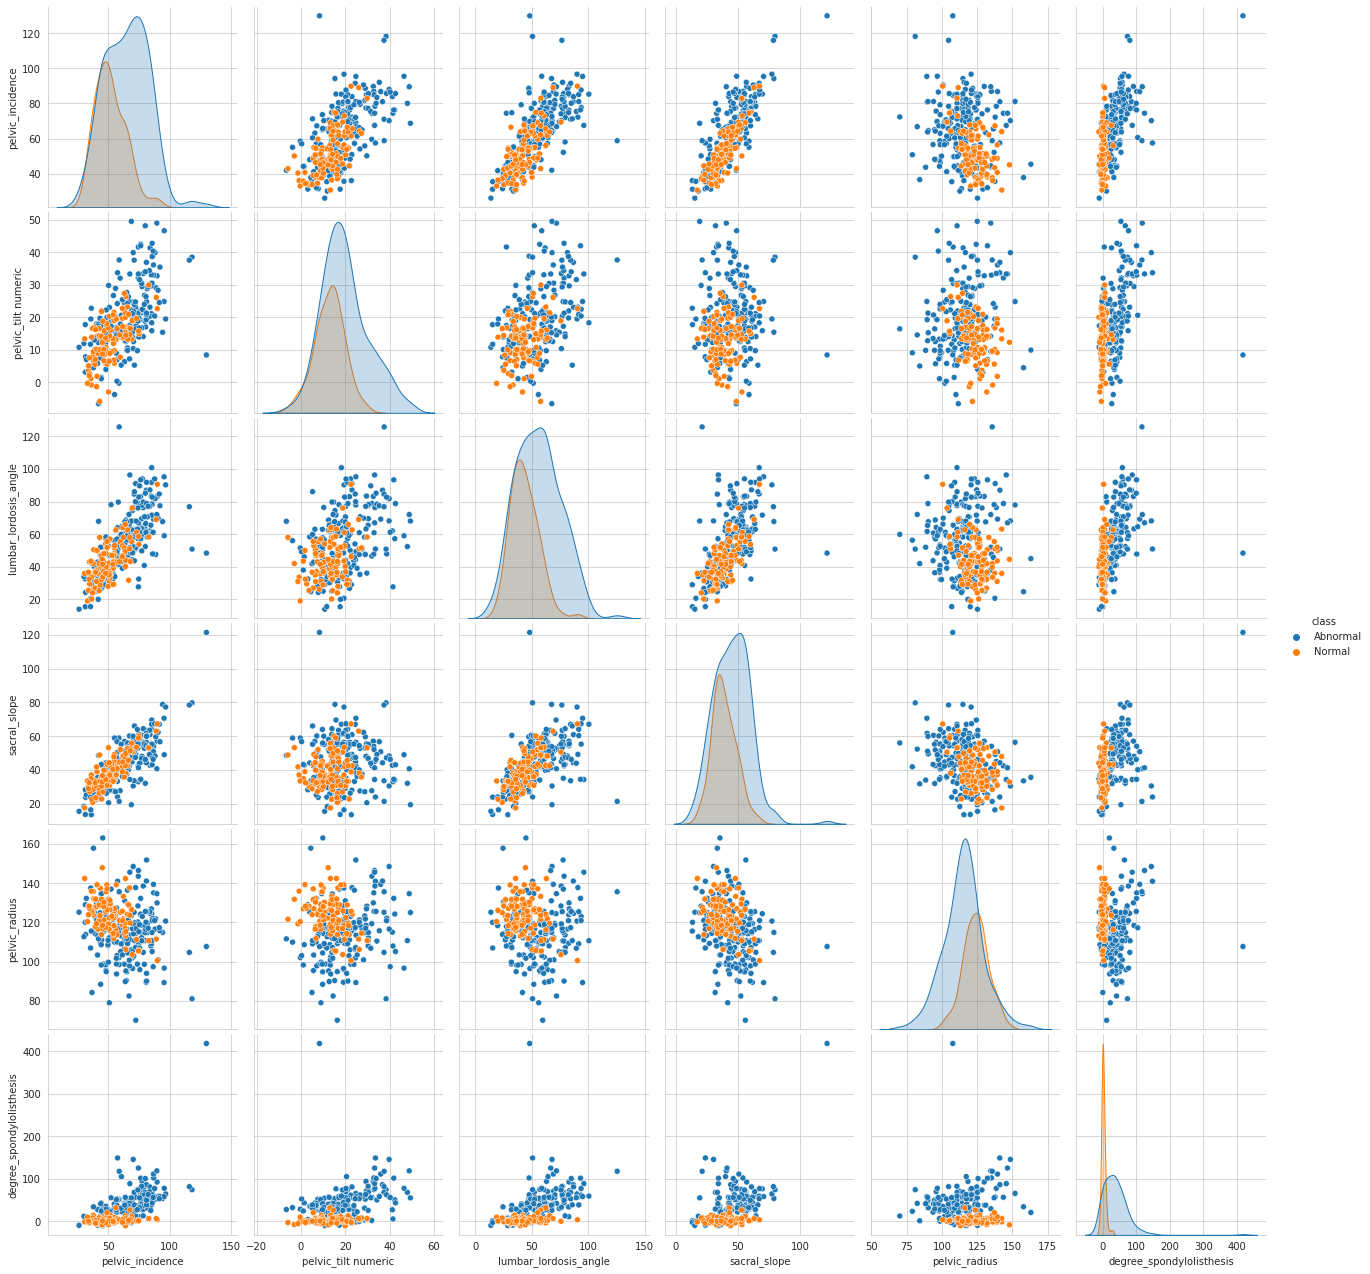

In [ ]:
sns.set_style('whitegrid');
sns.pairplot(df, hue='class', size=3);
plt.show()

Checking the target variable for balancing

In [ ]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

converting categorical features with 0 and 1

In [ ]:
df['symptom_class']=df['class'].replace({'Abnormal':0,'Normal':1})

In [ ]:
df['symptom_class']

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: symptom_class, Length: 310, dtype: int64

In [ ]:
df.drop('class',axis=1,inplace=True)

In [ ]:
df.head()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  symptom_class  
0      98.672917                 -0.254400              0  
1     114.405425                  4.564259              0  
2     105.985135                 -3.530317              0  
3     101.868495                 11.211523              0  
4     108.168725                  7.918501              0

In [ ]:
df.symptom_class.value_counts()

0    210
1    100
Name: symptom_class, dtype: int64

Taking x as independent and y as dependent values

In [ ]:
x = df.drop('symptom_class',axis=1)
y = df['symptom_class']

taking 80% for training and 20% for testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)


Importing KNeighborsClassifier library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_acc = []
value_k = []
for k in range(1, 10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_pred=knn.predict(x_train)
  train_score=accuracy_score(train_pred, y_train)
  test_pred=knn.predict(x_test)
  test_score=accuracy_score(y_test,test_pred)*100
  test_acc.append(test_score)
  value_k.append(k)
  print("Test Accuracy:", test_score, "value of K:",k)


Test Accuracy: 82.25806451612904 value of K: 1
Test Accuracy: 83.87096774193549 value of K: 2
Test Accuracy: 85.48387096774194 value of K: 3
Test Accuracy: 77.41935483870968 value of K: 4
Test Accuracy: 83.87096774193549 value of K: 5
Test Accuracy: 79.03225806451613 value of K: 6
Test Accuracy: 82.25806451612904 value of K: 7
Test Accuracy: 80.64516129032258 value of K: 8
Test Accuracy: 83.87096774193549 value of K: 9


In [ ]:
print('Best accuracy is found {} when k is {}'.format(max(test_acc),value_k[test_acc.index(max(test_acc))]))


Best accuracy is found 85.48387096774194 when k is 3


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.70      0.78      0.74        18

    accuracy                           0.84        62
   macro avg       0.80      0.82      0.81        62
weighted avg       0.85      0.84      0.84        62



In [ ]:
print(confusion_matrix(y_test,test_pred))


[[38  6]
 [ 4 14]]


Importing GaussianNB library

In [ ]:
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(x_train,y_train)
pred=nv.predict(x_test)

In [ ]:
print('Accuracy score :',accuracy_score(y_test,pred)*100)


Accuracy score : 79.03225806451613


In [ ]:
print(confusion_matrix(y_test,pred))


[[34 10]
 [ 3 15]]
